In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [163]:
# stroke_cases = DF[DF['stroke'] == 1]
# no_stroke_cases = DF[DF['stroke'] == 0].sample(n=len(stroke_cases), random_state=42)
# df = pd.concat([stroke_cases, no_stroke_cases], axis=0)

In [164]:
df.shape

(5110, 12)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [166]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [167]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [168]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [169]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [170]:
Xt=df.drop(['id'], axis=1)
Xt.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [171]:
target = 'stroke'
X = Xt.loc[:,Xt.columns!=target]
y = Xt.loc[:,Xt.columns==target]

In [172]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
X = pd.get_dummies(X[columns])

In [173]:
 import seaborn as sns

In [174]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
gender=enc.fit_transform(Xt['gender'])
Xt['gender']=gender
ever_married=enc.fit_transform(Xt['ever_married'])
Xt['ever_married']=ever_married
work_type=enc.fit_transform(Xt['work_type'])
Xt['work_type']=work_type
Residence_type=enc.fit_transform(Xt['Residence_type'])
Xt['Residence_type']=Residence_type
smoking_status=enc.fit_transform(Xt['smoking_status'])
Xt['smoking_status']=smoking_status

In [175]:
Xt.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [176]:
Xt.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [177]:
Xt.gender.value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [178]:
Xt.ever_married.value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

In [179]:
Xt.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [180]:
Xt.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [181]:
Xt.work_type.value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [182]:
Xt.Residence_type.value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

In [183]:
Xt.smoking_status.value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [184]:
categorical_features=['gender','ever_married','work_type','Residence_type','smoking_status']

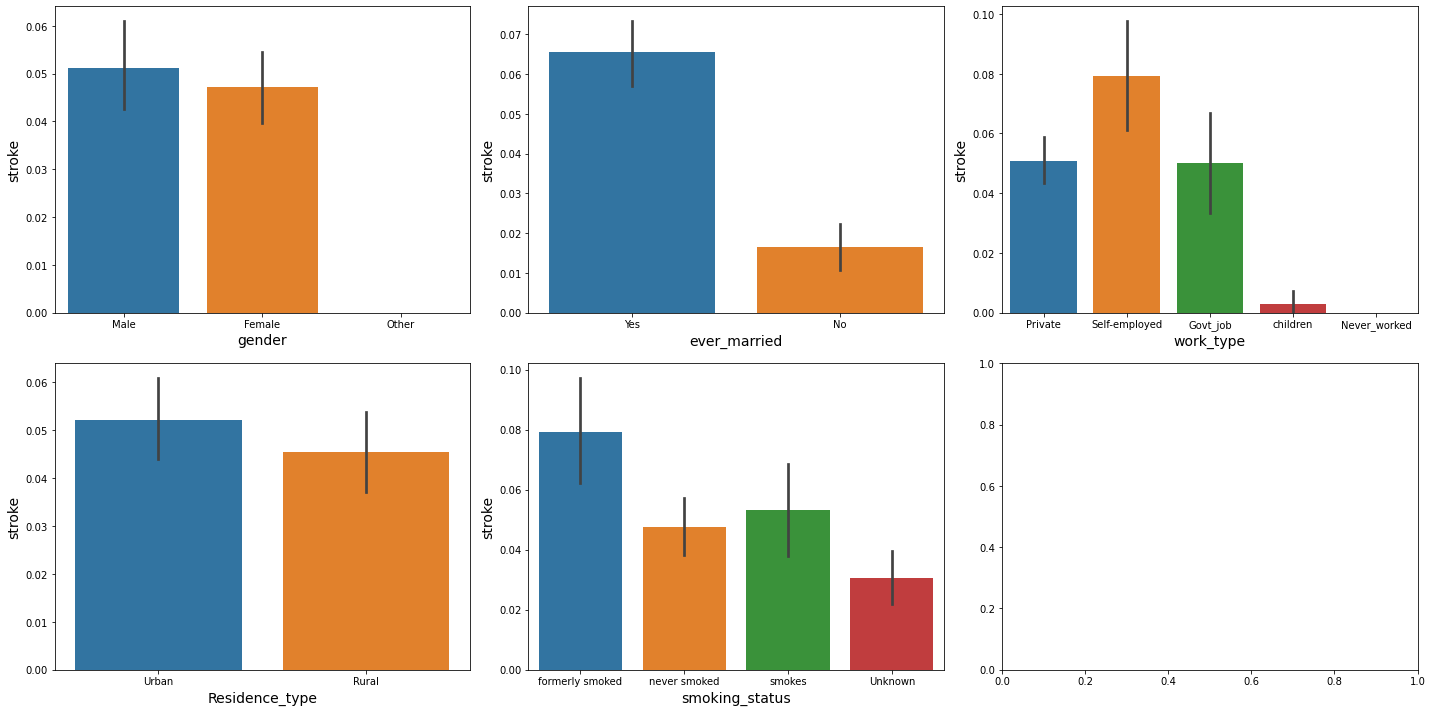

In [185]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'stroke'

for i, c in enumerate(categorical_features):
    sns.barplot(x=df[c], y=df[target], ax=axes[i])
    axes[i].set_ylabel('stroke', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)
    
plt.tight_layout()
plt.show()

In [93]:
# from ydata_profiling import ProfileReport

In [186]:
Xt.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [150]:
# profile = ProfileReport(Xt)
# profile.to_file(output_file = "brain_stroke.html")

In [187]:
Xt.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [188]:
Xt.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0
5109,0,44.0,0,0,1,0,1,85.28,26.200000,0,0


In [189]:
data=Xt

In [153]:
# gender = pd.get_dummies(Xt[['gender']])
# gender.head()

In [154]:
# married = pd.get_dummies(Xt[['ever_married']])
# married.head()

In [155]:
# work = pd.get_dummies(Xt[['work_type']])
# work.head()

In [156]:
# residence = pd.get_dummies(Xt[['Residence_type']])
# residence.head()

In [157]:
# smoking = pd.get_dummies(Xt[['smoking_status']])
# smoking.head()

In [160]:
# data = pd.concat([Xt, gender, married, work, residence, smoking], axis = 1)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1


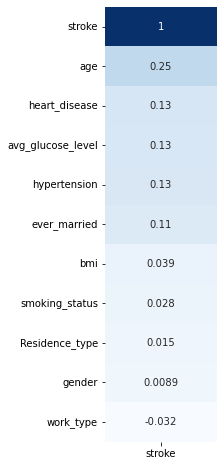

In [190]:
corr = data.corr()['stroke'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr, cmap='Blues', cbar=False, annot=True)
plt.show()

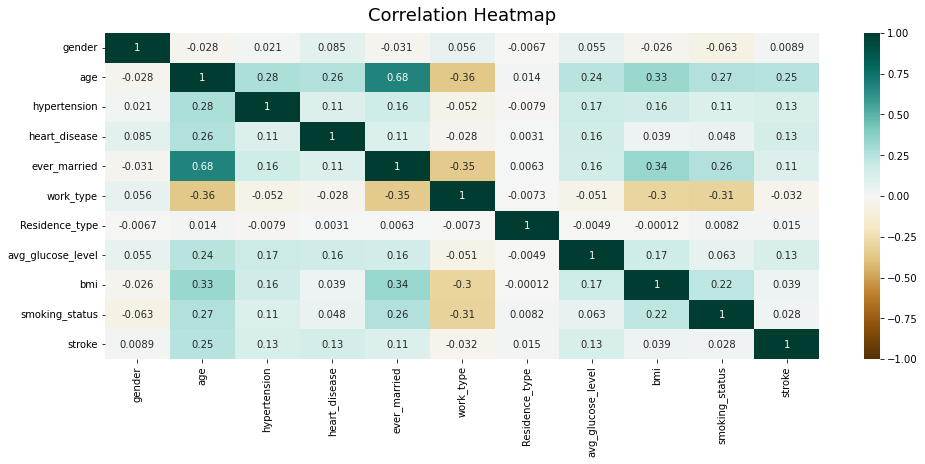

In [191]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [192]:
X= data.drop("stroke", axis=1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [193]:
y= data[['stroke']]
y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


In [194]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_sm, y_train_sm = oversample.fit_resample(X, y)

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(x_train_sm,y_train_sm,test_size=0.3,random_state=42)

In [196]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [197]:
import pickle
import os
scaler_path=os.path.join('C:/Users/siddhesh/Brain_Stroke_Prediction','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [198]:
# Logistic Classifier

In [199]:
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,mean_absolute_error as mae,log_loss
from sklearn import metrics
from sklearn import linear_model
lr= linear_model.LogisticRegression(max_iter=10000)  
lr.fit(X_train_std, Y_train.values.ravel())  
Y_pred1= lr.predict(X_test_std)  
testing_data_accuracy=accuracy_score(Y_pred1,Y_test)*100
print(f'Accuracy of model on test dataset:-{testing_data_accuracy}')
confusion_lr = metrics.confusion_matrix(Y_test, Y_pred1)
print("Confusion Matrix : \n" +str(confusion_lr))
TP = confusion_lr[1, 1]
TN = confusion_lr[0, 0]
FP = confusion_lr[0, 1]
FN = confusion_lr[1, 0]

Accuracy of model on test dataset:-80.28796708947549
Confusion Matrix : 
[[1139  318]
 [ 257 1203]]


In [200]:
acc=((TP + TN) / float(TP + TN + FP + FN))*100
print("Accuracy : " + str(acc))
sensitivity = (TP / float(FN + TP))*100
print("Sensitivity : " + str(sensitivity))
specificity = (TN / float(TN + FP))*100
print("Specificity : " + str(specificity))
false_positive_rate = (FP / float(TN + FP))*100
print("False_Positive_Rate : " + str(false_positive_rate))
false_negative_rate = (FN / float(TP + FN))*100
print("False_Negative_Rate : " + str(false_negative_rate))
from math import sqrt
logloss = log_loss(Y_test,lr.predict_proba(X_test_std))
print("Log_Loss :"+str(logloss))

Accuracy : 80.28796708947549
Sensitivity : 82.3972602739726
Specificity : 78.17433081674675
False_Positive_Rate : 21.82566918325326
False_Negative_Rate : 17.602739726027398
Log_Loss :0.4131662493368052


In [201]:
# Random Forest Classifier

In [202]:
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,mean_absolute_error as mae,log_loss
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators= 20, criterion="entropy")  
rf.fit(X_train_std, Y_train.values.ravel())  
Y_pred2= rf.predict(X_test_std)  
testing_data_accuracy=accuracy_score(Y_pred2,Y_test)*100
print(f'Accuracy of model on test dataset:-{testing_data_accuracy}')
confusion_rf = metrics.confusion_matrix(Y_test, Y_pred2)
print("Confusion Matrix : \n" +str(confusion_rf))
TP = confusion_rf[1, 1]
TN = confusion_rf[0, 0]
FP = confusion_rf[0, 1]
FN = confusion_rf[1, 0]

Accuracy of model on test dataset:-93.8635584504628
Confusion Matrix : 
[[1336  121]
 [  58 1402]]


In [203]:
acc=((TP + TN) / float(TP + TN + FP + FN))*100
print("Accuracy : " + str(acc))
sensitivity = (TP / float(FN + TP))*100
print("Sensitivity : " + str(sensitivity))
specificity = (TN / float(TN + FP))*100
print("Specificity : " + str(specificity))
false_positive_rate = (FP / float(TN + FP))*100
print("False_Positive_Rate : " + str(false_positive_rate))
false_negative_rate = (FN / float(TP + FN))*100
print("False_Negative_Rate : " + str(false_negative_rate))
from math import sqrt
logloss = log_loss(Y_test,rf.predict_proba(X_test_std))
print("Log_Loss :"+str(logloss))

Accuracy : 93.8635584504628
Sensitivity : 96.02739726027397
Specificity : 91.69526424159231
False_Positive_Rate : 8.304735758407688
False_Negative_Rate : 3.9726027397260277
Log_Loss :0.1919303428790192


In [204]:
import joblib
model_path=os.path.join('C:/Users/siddhesh/Brain_Stroke_Prediction','models/rf.sav')
joblib.dump(rf,model_path)

['C:/Users/siddhesh/Brain_Stroke_Prediction\\models/rf.sav']

In [205]:
# Decision Tree Classifier

In [206]:
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,mean_absolute_error as mae,log_loss
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier  
dtclassifier=  DecisionTreeClassifier(random_state=0, criterion="entropy")  
dtclassifier.fit(X_train_std, Y_train)  
Y_pred3= dtclassifier.predict(X_test_std)  
testing_data_accuracy2=accuracy_score(Y_pred3,Y_test)*100
print(f'Accuracy of model on test dataset:-{testing_data_accuracy2}')
confusion = metrics.confusion_matrix(Y_test, Y_pred3)
print("Confusion Matrix : \n" +str(confusion))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

Accuracy of model on test dataset:-91.46383270483373
Confusion Matrix : 
[[1299  158]
 [  91 1369]]


In [207]:
acc2=((TP + TN) / float(TP + TN + FP + FN))*100
print("Accuracy : " + str(acc2))
sensitivity = (TP / float(FN + TP))*100
print("Sensitivity : " + str(sensitivity))
specificity = (TN / float(TN + FP))*100
print("Specificity : " + str(specificity))
false_positive_rate = (FP / float(TN + FP))*100
print("False_Positive_Rate : " + str(false_positive_rate))
false_negative_rate = (FN / float(TP + FN))*100
print("False_Negative_Rate : " + str(false_negative_rate))
logloss = log_loss(Y_test,dtclassifier.predict_proba(X_test_std))
print("Log_Loss :"+str(logloss))

Accuracy : 91.46383270483373
Sensitivity : 93.76712328767123
Specificity : 89.15579958819492
False_Positive_Rate : 10.844200411805078
False_Negative_Rate : 6.232876712328768
Log_Loss :3.076746552584906


In [208]:
# SVM Classifier

In [209]:
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,mean_absolute_error as mae,log_loss
from sklearn import metrics
from sklearn.svm import SVC
svc_model = SVC(C= .1, kernel='linear', gamma= 1,probability=True)
svc_model.fit(X_train_std, Y_train.values.ravel())
Y_pred4= svc_model.predict(X_test_std)
testing_data_accuracy1=accuracy_score(Y_pred4,Y_test)*100
print(f'Accuracy of model on test dataset:-{testing_data_accuracy1}')
confusion_svm = metrics.confusion_matrix(Y_test, Y_pred4)
print("Confusion Matrix : \n" +str(confusion_svm))
TP = confusion_svm[1, 1]
TN = confusion_svm[0, 0]
FP = confusion_svm[0, 1]
FN = confusion_svm[1, 0]

Accuracy of model on test dataset:-80.42509427494001
Confusion Matrix : 
[[1136  321]
 [ 250 1210]]


In [210]:
acc1=((TP + TN) / float(TP + TN + FP + FN))*100
print("Accuracy : " + str(acc1))
sensitivity = (TP / float(FN + TP))*100
print("Sensitivity : " + str(sensitivity))
specificity = (TN / float(TN + FP))*100
print("Specificity : " + str(specificity))
false_positive_rate = (FP / float(TN + FP))*100
print("False_Positive_Rate : " + str(false_positive_rate))
false_negative_rate = (FN / float(TP + FN))*100
print("False_Negative_Rate : " + str(false_negative_rate))
logloss = log_loss(Y_test,svc_model.predict_proba(X_test_std))
print("Log_Loss :"+str(logloss))

Accuracy : 80.42509427494001
Sensitivity : 82.87671232876713
Specificity : 77.96842827728209
False_Positive_Rate : 22.031571722717914
False_Negative_Rate : 17.123287671232877
Log_Loss :0.414205400225093


Text(0.5, 1.0, 'Accuracy')

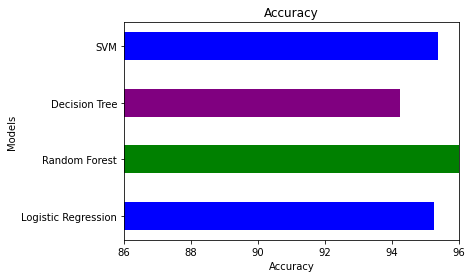

In [211]:
h= ["Logistic Regression","Random Forest", "Decision Tree", "SVM"]
x=[95.26 ,96.98 ,94.24,95.37 ]
c=["blue","green","purple"]
plt.barh(h,x,0.5,color=c)
left,right=plt.xlim(86,96)
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.title("Accuracy")


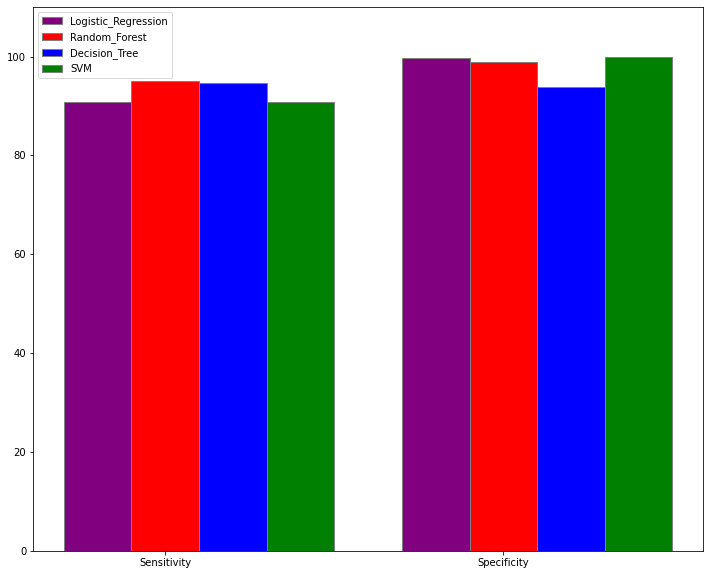

In [212]:

# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(12, 10))

# set height of bar
Logistic_Regression= [90.82,99.77]
Random_Forest = [95.06, 98.90]
Decision_Tree = [94.65, 93.82]
SVM = [90.75, 100]

# Set position of bar on X axis
br1 = np.arange(len(Logistic_Regression))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

bottom,top=plt.ylim(0,110)

# Make the plot

plt.bar(br1, Logistic_Regression, color ='purple', width = barWidth,
		edgecolor ='grey', label ='Logistic_Regression')
plt.bar(br2, Random_Forest, color ='r', width = barWidth,
		edgecolor ='grey', label ='Random_Forest')
plt.bar(br3, Decision_Tree, color ='b', width = barWidth,
		edgecolor ='grey', label ='Decision_Tree')
plt.bar(br4, SVM, color ='g', width = barWidth,
		edgecolor ='grey', label ='SVM')

# Adding Xticks
plt.xticks([r + barWidth for r in range(len(Logistic_Regression))],
		['Sensitivity', 'Specificity'])

plt.legend()
plt.show()